# Logistic Regression as a Neural Network

We will build a logistic regression classifier to recognize cats with a Neural Network mindset.

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from lr_utils import load_dataset

%matplotlib inline

## Overview of Problem Set

We have a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [2]:
#loading the data
x_train_orig, y_train, x_test_orig, y_test, classes = load_dataset()

y= 1 ,it's a cat picture


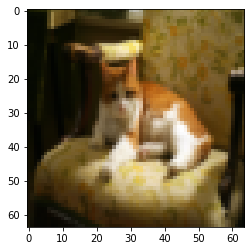

In [39]:
#checking image
index = 7
plt.imshow(x_train_orig[index])

print("y=",y_train[0,index],",it's a",classes[y_train[0,index]].decode('utf-8'),'picture')

In [41]:
x_train_orig.shape

(209, 64, 64, 3)

In [46]:
#checking vectors/matrix dimensions
m_train = x_train_orig.shape[0]
m_test = x_test_orig.shape[0]
num_px = x_train_orig.shape[1]

print("No. of training examples:",m_train)
print("No. of test examples:",m_test)
print("Dimension of image:",num_px,"*",num_px)
print("x_train shape:",x_train_orig.shape)
print("y_train shape:",y_train.shape)
print("x_test_orig shape:",x_test_orig.shape)
print("y_test.shape:",y_test.shape)

No. of training examples: 209
No. of test examples: 50
Dimension of image: 64 * 64
x_train shape: (209, 64, 64, 3)
y_train shape: (1, 209)
x_test_orig shape: (50, 64, 64, 3)
y_test.shape: (1, 50)


In [51]:
#Reshape the training and test examples
x_train = x_train_orig.reshape(x_train_orig.shape[0],-1).T
x_test = x_test_orig.reshape(x_test_orig.shape[0],-1).T

print("Before reshaping/flatten")
print("x_train shape:",x_train_orig.shape)
print("x_test shape:",x_test_orig.shape)
print("\nAfter reshaping/flatten")
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

Before reshaping/flatten
x_train shape: (209, 64, 64, 3)
x_test shape: (50, 64, 64, 3)

After reshaping/flatten
x_train shape: (12288, 209)
x_test shape: (12288, 50)


In [52]:
#standardize our dataset
x_train = x_train/255.
x_test = x_test/255

## General Architecture of learning algorithm

We will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why Logistic Regression is actually a very simple Neural Network!

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">